In [ ]:
#hide this cell when in use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!git clone https://github.com/propublica/compas-analysis/
from datetime import datetime

Cloning into 'compas-analysis'...
remote: Enumerating objects: 31, done.
remote: Total 31 (delta 0), reused 0 (delta 0), pack-reused 31
Receiving objects: 100% (31/31), 15.24 MiB | 4.91 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Updating files: 100% (12/12), done.


Import necessary datasets

In [ ]:
two_years_v = pd.read_csv('./compas-analysis/compas-scores-two-years-violent.csv')
two_years = pd.read_csv('./compas-analysis/compas-scores-two-years.csv')
compas = pd.read_csv('./compas-analysis/compas-scores.csv')

#convert date of birth column to age
dated = pd.to_datetime(compas['dob'], format="%Y-%m-%d")
year = pd.DatetimeIndex(compas['dob']).year
compas['age'] = 2024 - year

compas_simple = compas[['id', 'name', 'sex', 'age', 'priors_count', 'decile_score', 'score_text']].set_index('id')
compas_full = compas[compas.is_recid != -1][['id', 'name', 'sex', 'age', 'priors_count', 'race', 'decile_score', 'score_text', 'is_recid']].set_index('id')
compas_total = compas[compas.is_recid != -1][['id', 'name', 'sex', 'age', 'priors_count', 'race', 'decile_score', 'score_text', 'is_recid', 'race']].set_index('id')
#consider using more columns later

In [ ]:
compas.size

552579

In [ ]:
compas_full.columns

Index(['name', 'sex', 'age', 'priors_count', 'race', 'decile_score',
       'score_text', 'is_recid'],
      dtype='object')

# Introduction

##### Note: The most recent edits are in the student version. Todo: add them back here.

##### Northpointe, a for-profit company, has created a model that generates 'risk scores' for criminals, representing the likelihood of reoffending, based on several factors. You have decided to analyze their data for accuracy. Below is a table which contains defendent information. The 'decile_score' column is a number between 1-9 that represents the algorithm's output, and the 'score_text' column corresponds to a low, medium, or high score.

In [ ]:
compas_simple.head(5)

,name,sex,age,priors_count,decile_score,score_text
id,,,,,,
1,miguel hernandez,Male,77,0,1,Low
2,michael ryan,Male,39,0,5,Medium
3,kevon dixon,Male,42,0,3,Low
4,ed philo,Male,33,4,4,Low
5,marcu brown,Male,31,1,8,High


## Question 1: Understanding the Data

Learning goals:
1. Recognize the potential to abuse science for social and political ends.
Show heightened caution in situations in which science involves the study of human groups and subsequent validation of societal power structures.
2. Recognize that you yourself are always involved in some social dynamic that may be relevant to the assessment of any particular study of human groups

Students should be able to realize the motivation behind creating the algorithm, and the potential political/social implications that these scores would have. They should be able to identify who would profit from the use of this algorithm, and which demographics may suffer. Second learning goal may be harder to address.

###NOTE: add coding to calculate correlation co-efficient? Signal/Noise etc

**Question 1.0** Possibly remove: In transforming decile scores to low, medium, or high, uncertainty was produced. Fill in the box below to determine the signal to noise ratio both before and after conversion. (This can be turned into a written question.)
**This may be more relevant near question 2.1**

_ANSWER HERE_

**Question 1.1** What columns would be useful to predict whether a defendant would reoffend? What would you expect higher values to correspond to? What would we not want to include as variables when we predict?

_ANSWER HERE_

**Question 1.2**  Who would this algorithm be used by, and what for? Please answer beyond the context that was given.

_ANSWER HERE_

**Question 1.3 (code)** - We're interested in seeing whether certain factors are correlated with decile scores. Fill out the code below to generate visualizations of these variables' distributions.

Text(0.5, 1.0, 'Recidivism Decile Scores vs. Defendant Age')

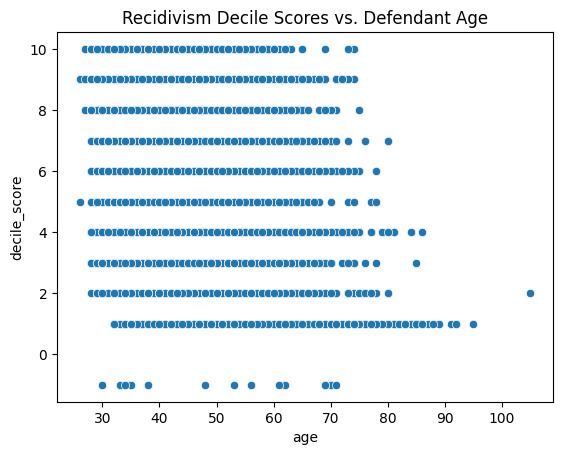

In [ ]:
sns.scatterplot(data=compas_simple, x = 'age', y='decile_score')
plt.title("Recidivism Decile Scores vs. Defendant Age")

<Axes: xlabel='decile_score', ylabel='Count'>

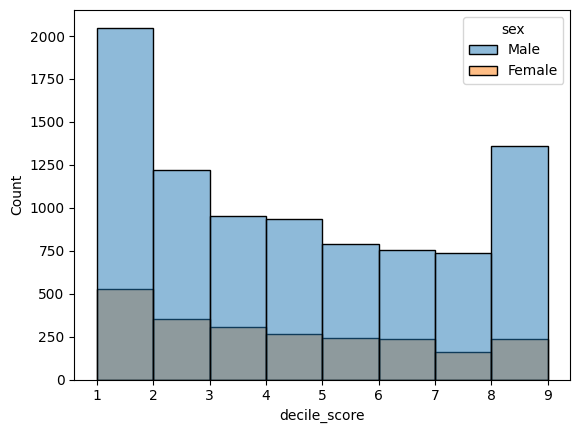

In [ ]:
sns.histplot(data=compas_simple, x = 'decile_score', hue='sex', bins=range(1, 10, 1))

<Axes: xlabel='priors_count', ylabel='decile_score'>

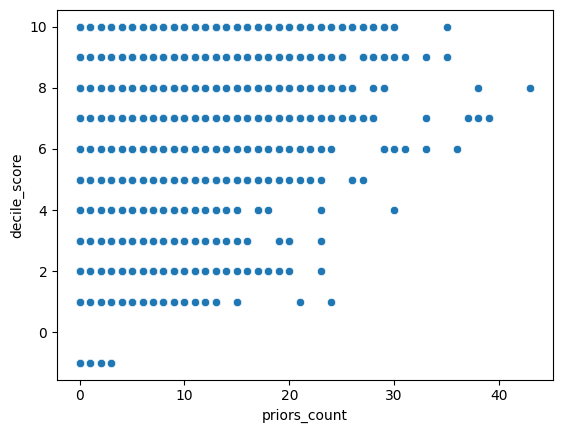

In [ ]:
sns.scatterplot(data=compas_simple, x = 'priors_count', y='decile_score')

**Question 1.4** Do you see any patterns in the data? What corresponds to a higher decile score?


_ANSWER HERE_

# Question 2: Impacts

##### Have students code false positive/false negative rates - how do we balance these in this model? Think about implications of each for different groups. Which one should we prioritize?

##### What does an accurate model mean?

 Learning Goals:
 1. Understand that there is always the inevitability of a trade-off—for a given test, one can reduce the risk of false positives by increasing the risk of false negatives, and vice versa. Holding model choice constant, you make this trade-off when you determine what a threshold is (e.g. convict someone if you're 99% or 70% certain that they're guilty).
 2. Understand that whether false positive or negative is preferable depends on a human's value judgement on the consequences of either: (e.g. "innocent people shouldn't be in jail") and risks (e.g. dangerous people committing more crimes).

 Students should be able to understand from this question the trade-off between accuracy and recall when assigning a risk scores. The harms of false positives (giving someone a longer sentence than they should get, social harm they may receive from being classified as high harm, financial harm that may come from this score, etc), and the harms of a false negative (releasing a criminal). This question is meant to engage students in a discussion on trying to assign numbers to morality.

Suppose we now have access to whether the defendant actually reoffended - this data is stored in our is_recid column, which is a 1 if they recidivized, and a 0 if they did not.

In [ ]:
compas_full.head(5) #with recid column - labelled 1 if they did reoffend, and 0 otherwise

,name,sex,age,priors_count,race,decile_score,score_text,is_recid
id,,,,,,,,
1,miguel hernandez,Male,77,0,Other,1,Low,0
3,kevon dixon,Male,42,0,African-American,3,Low,1
4,ed philo,Male,33,4,African-American,4,Low,1
5,marcu brown,Male,31,1,African-American,8,High,0
6,bouthy pierrelouis,Male,51,2,Other,1,Low,0


**Question 2.1** Write code to calculate the accuracy, false_positive, and false_negative rates. (We can assume a score_text of Medium or High is a prediction that the defendant will reoffend, and a score_text of Low is a prediction the defendant will not reoffend).



In [ ]:
accuracy = ...
false_positive = ...
false_negative = ...

In [ ]:
#ANSWER
true_positives = len(compas_full[( ( compas_full.is_recid==1) &
 (compas_full.score_text == 'Medium') | (compas_full.score_text == 'High') )])
true_negatives = len(compas_full[( compas_full.is_recid==0) & (compas_full.score_text == 'Low' ) ])
false_positives = len(compas_full[(( compas_full.is_recid==0) & (compas_full.score_text == 'Medium') | (compas_full.score_text == 'High') ) ])
false_negatives = len(compas_full[( compas_full.is_recid==1) & (compas_full.score_text == 'Low') ])


accuracy = (true_positives + true_negatives) / len(compas_full)
false_positive_rate = false_positives / len(compas_full)
false_negative_rate = false_negatives / len(compas_full)

print(accuracy, false_positive_rate, false_negative_rate)

0.7241348070302591 0.3362022105453887 0.1288276861750317


**Question 2.2** It seems like the accuracy of our model is pretty high (by some standards)! However, it also has a high rate of false positives compared to false negatives. What are the potential implications of a false positive or a false negative?

_ANSWER HERE_

**Question 2.3** In this scenario, how should we balance false positives and false negatives? Which one is more harmful, and which one would the users of this algorithm be motivated to minimze?

_ANSWER HERE_

**Question 2.4** Suppose that we want to calculate the accuracy, false positive, and false negatives based off the decile score, and not the score_text column. Below we have defined a function that calculates these statistics based off a given decile score threshold, which would represent a positive prediction in our algorithm. Explain any patterns you see as you increase or decrease the threshold.

In [ ]:
threshold = ...#Set by a slider maybe (or random number generator)

def hidden_function(tbl, threshold):
  true_positives = len(tbl[( (tbl.is_recid==1) &
  (tbl.decile_score >= threshold) )])
  true_negatives = len(tbl[(tbl.is_recid==0) & (tbl.decile_score < threshold) ])
  false_positives = len(tbl[((tbl.is_recid==0) & (tbl.decile_score >= threshold) ) ])
  false_negatives = len(tbl[(tbl.is_recid==1) & (tbl.decile_score < threshold) ])

  accuracy = (true_positives + true_negatives) / len(tbl)
  false_positive_rate = false_positives / len(tbl)
  false_negative_rate = false_negatives / len(tbl)
  print('Accuracy: ', accuracy)
  print('False Positive Rate: ', false_positive_rate)
  print('False Negative Rate: ', false_negative_rate)
  return [accuracy, false_positive_rate, false_negative_rate]

#Test the function out with different numbers to see how the statistics change!
#hidden_function(...)

_ANSWER HERE_

##**End of Part 1**

# PART 2 - Question 3: A Hidden Impact

Introduce the Race column to students to see the difference.

Learning Goals:
1. Distinguish between singular and general causation.
2. Distinguish between the evidence needed to establish singular or general causation.
3. Identify different policy implications of singular or general causation.
4. Recognize cases where omission bias and status quo bias can influence decision making, even when this results in a worse outcome.

Students should be able to realize disproportionate impact, and discuss how different groups may experience impacts. In addition, students should think about the difficulties of using computer algorithms to try and predict human experiences. A general trend of higher priors, or race correlating with higher rates of recidivism may exist, but that does not mean this trait causes a person to recidivize.

**Question 3.1** Calculate accuracy for black versus white defendants. The accuracy for white defendants is provided for you. You can assume the threshold is a decile score of 4.

In [ ]:
compas_full

,name,sex,age,priors_count,race,decile_score,score_text,is_recid
id,,,,,,,,
1,miguel hernandez,Male,77,0,Other,1,Low,0
3,kevon dixon,Male,42,0,African-American,3,Low,1
4,ed philo,Male,33,4,African-American,4,Low,1
5,marcu brown,Male,31,1,African-American,8,High,0
6,bouthy pierrelouis,Male,51,2,Other,1,Low,0
...,...,...,...,...,...,...,...,...
11753,patrick hamilton,Male,56,1,Other,3,Low,0
11754,raymond hernandez,Male,31,3,Caucasian,7,Medium,1
11755,dieuseul pierre-gilles,Male,43,0,Other,4,Low,0


In [ ]:
#hide this cell from students, or put in raw numbers
compas_white = compas_full[compas_full.race=="Caucasian"]

hidden_function(compas_white, 4)

Accuracy:  0.6270298585646935
False Positive Rate:  0.2658459926663174
False Negative Rate:  0.107124148768989


[0.6270298585646935, 0.2658459926663174, 0.107124148768989]

In [ ]:
#Fill in the ellipses here
compas_black = ...
statistics_array = ...

In [ ]:
#ANSWER
compas_black = compas_full[compas_full.race=="African-American"]
statistics_array = hidden_function(compas_black, 4)

Accuracy:  0.560807125977095
False Positive Rate:  0.36138883839301944
False Negative Rate:  0.07780403562988547


[0.560807125977095, 0.36138883839301944, 0.07780403562988547]

**Question 3.2** How do these statistics differ? Can you think of any reasons why this may be the case?

_ANSWER HERE_

**Question 3.3** Considering those who designed COMPAS, what columns would be considered correlation, general causation, and singular causation when it comes to recidivism? Consider the effect that this algorithm would have on its defendant, and whether this is a randomized controlled experiment (maybe don't mention this part to students). What factors may affect a person's decision to recidivize?

Under which criteria is reducing the human experience to a model justified? How would reductionism relate to this?

_ANSWER HERE_

<Axes: xlabel='decile_score', ylabel='Count'>

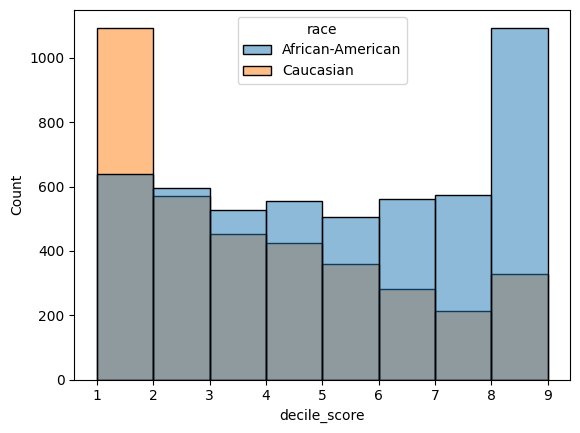

In [ ]:
filtered_race = compas_full[(compas_full.race == 'African-American') | (compas_full.race == 'Caucasian')]
sns.histplot(data=filtered_race, x = 'decile_score', hue='race', bins=range(1, 10, 1))

# Question 4: Biases

You realize through a hypothetical source that Northpointe forgot to properly clean their data. What form of bias would this be categorized as? The tradeoff between false positives and negatives is sometimes driven by bias.

**Question 4.1** What are other sources of bias in the process of training this algorithm and running inference? (Simplify this question depending on prior experience).

_ANSWER HERE_

# Concluding questions

**Question 4.2** Read these articles before answering this question:

[Washington Post](https://https://www.washingtonpost.com/news/monkey-cage/wp/2016/10/17/can-an-algorithm-be-racist-our-analysis-is-more-cautious-than-propublicas/)

[ProPublica](https://https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm)

Is COMPAS a suitable model?
What factors motivate people to overlook flaws in this model? (consider overlaps with other questions and condense)

_ANSWER HERE_